## Data Dictionary
Age: Age of the gym member. \
Gender: Gender of the gym member (Male or Female). \
Weight (kg): Member’s weight in kilograms. \
Height (m): Member’s height in meters. \
Max_BPM: Maximum heart rate (beats per minute) during workout sessions. \
Avg_BPM: Average heart rate during workout sessions. \
Resting_BPM: Heart rate at rest before workout. \
Session_Duration (hours): Duration of each workout session in hours. \
Calories_Burned: Total calories burned during each session. \
Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT). \
Fat_Percentage: Body fat percentage of the member. \
Water_Intake (liters): Daily water intake during workouts. \
Workout_Frequency (days/week): Number of workout sessions per week. \
Experience_Level: Level of experience, from beginner (1) to expert (3). \
BMI: Body Mass Index, calculated from height and weight. 

In [262]:
# load in data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [263]:
gym_data = pd.read_csv("gym_members_exercise_tracking.csv")

In [264]:
gym_data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [265]:
"""
My stats (Needed from workout = ~, unsure = /):
 Age: 25
 Gender: Male
 Weight (kg): 77.1
 Height (m): 1.82
 Max BPM:    ~
 Avg BPM:    ~
 Resting BPM:    /
 Session duration (hours):    ~
 Calories burned: <target variable> 
 Workout_Type:   ~ (Probably strength)
 Fat_Percentage: /
 Water intake: ~ / 
 Workout frequency: days per week
 Experience level: 3
 BMI:  /
 
"""

'\nMy stats (Needed from workout = ~, unsure = /):\n Age: 25\n Gender: Male\n Weight (kg): 77.1\n Height (m): 1.82\n Max BPM:    ~\n Avg BPM:    ~\n Resting BPM:    /\n Session duration (hours):    ~\n Calories burned: <target variable> \n Workout_Type:   ~ (Probably strength)\n Fat_Percentage: /\n Water intake: ~ / \n Workout frequency: days per week\n Experience level: 3\n BMI:  /\n \n'

Change column names to something more usable

In [266]:
gym_data.columns = ['age',	'gender',	'weight', 'height', 'max_bpm',	'avg_bpm',
                    'resting_bpm',	'session_duration',	'calories_burned',	'workout_type',
                    'fat_percentage',	'water_intake', 'workout_frequency', 'experience_level',
                    'BMI']

Check for NaNs and values that make no sense

In [267]:
len(gym_data)

973

In [268]:
gym_data.describe()

age      weight     height     max_bpm     avg_bpm  resting_bpm  \
count  973.000000  973.000000  973.00000  973.000000  973.000000   973.000000   
mean    38.683453   73.854676    1.72258  179.883864  143.766701    62.223022   
std     12.180928   21.207500    0.12772   11.525686   14.345101     7.327060   
min     18.000000   40.000000    1.50000  160.000000  120.000000    50.000000   
25%     28.000000   58.100000    1.62000  170.000000  131.000000    56.000000   
50%     40.000000   70.000000    1.71000  180.000000  143.000000    62.000000   
75%     49.000000   86.000000    1.80000  190.000000  156.000000    68.000000   
max     59.000000  129.900000    2.00000  199.000000  169.000000    74.000000   

       session_duration  calories_burned  fat_percentage  water_intake  \
count        973.000000       973.000000      973.000000    973.000000   
mean           1.256423       905.422405       24.976773      2.626619   
std            0.343033       272.641516        6.259419      0.600172   
min            0.500000       303.000000       10.000000      1.500000   
25%            1.040000       720.000000       21.300000      2.200000   
50%            1.260000       893.000000       26.200000      2.600000   
75%            1.460000      1076.000000       29.300000      3.100000   
max            2.000000      1783.000000       35.000000      3.700000   

       workout_frequency  experience_level         BMI  
count         973.000000        973.000000  973.000000  
mean            3.321686          1.809866   24.912127  
std             0.913047          0.739693    6.660879  
min             2.000000          1.000000   12.320000  
25%             3.000000          1.000000   20.110000  
50%             3.000000          2.000000   24.160000  
75%             4.000000          2.000000   28.560000  
max             5.000000          3.000000   49.840000

Values look good, lets encode the categorical ones

In [269]:
gym_data['gender'].value_counts()

gender
Male      511
Female    462
Name: count, dtype: int64

Let's make the Gender column the following: \
If gender is male, gender = 1
If gender is female, gender = 0 

In [270]:
gym_data['gender_encoded'] = gym_data['gender'].apply(lambda x : 1 if x == 'Male' else 0)
gym_data['gender_encoded'].value_counts()

gender_encoded
1    511
0    462
Name: count, dtype: int64

In [271]:
gym_data['workout_type'].value_counts()

workout_type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

Lets create an ordinally encoded column and a onehot encoded column for workout type

In [272]:
gym_data['workout_type_ordinal'] = gym_data['workout_type'].apply(lambda x: 0 if x == 'Strength' else 1 if x == 'Cardio' else 2 if x == 'Yoga' else 3)
gym_data['workout_type_ordinal'].value_counts()

workout_type_ordinal
0    258
1    255
2    239
3    221
Name: count, dtype: int64

In [273]:
gym_data['strength_dummy'] = gym_data['workout_type'].apply(lambda x:1 if x == 'Strength' else 0)
gym_data['cardio_dummy'] = gym_data['workout_type'].apply(lambda x:1 if x == 'Cardio' else 0)
gym_data['yoga_dummy'] = gym_data['workout_type'].apply(lambda x:1 if x == 'Yoga' else 0)
for col_name in ['strength_dummy', 'cardio_dummy', 'yoga_dummy']:
    print(col_name, sum(gym_data[col_name]))

strength_dummy 258
cardio_dummy 255
yoga_dummy 239


# Exploratory Data Analysis

Display the distribution of each numeric variable, include effects of categorical variables

In [274]:
numeric_columns = ['age',  'weight', 'height', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration',
       'fat_percentage', 'water_intake', 'workout_frequency',
       'experience_level', 'BMI']
response_column = ['calories_burned']
categorical_columns = ['gender', 'workout_type']
encoded_categorical_columns = ['gender_encoded','workout_type_ordinal', 'strength_dummy',
       'cardio_dummy', 'yoga_dummy']

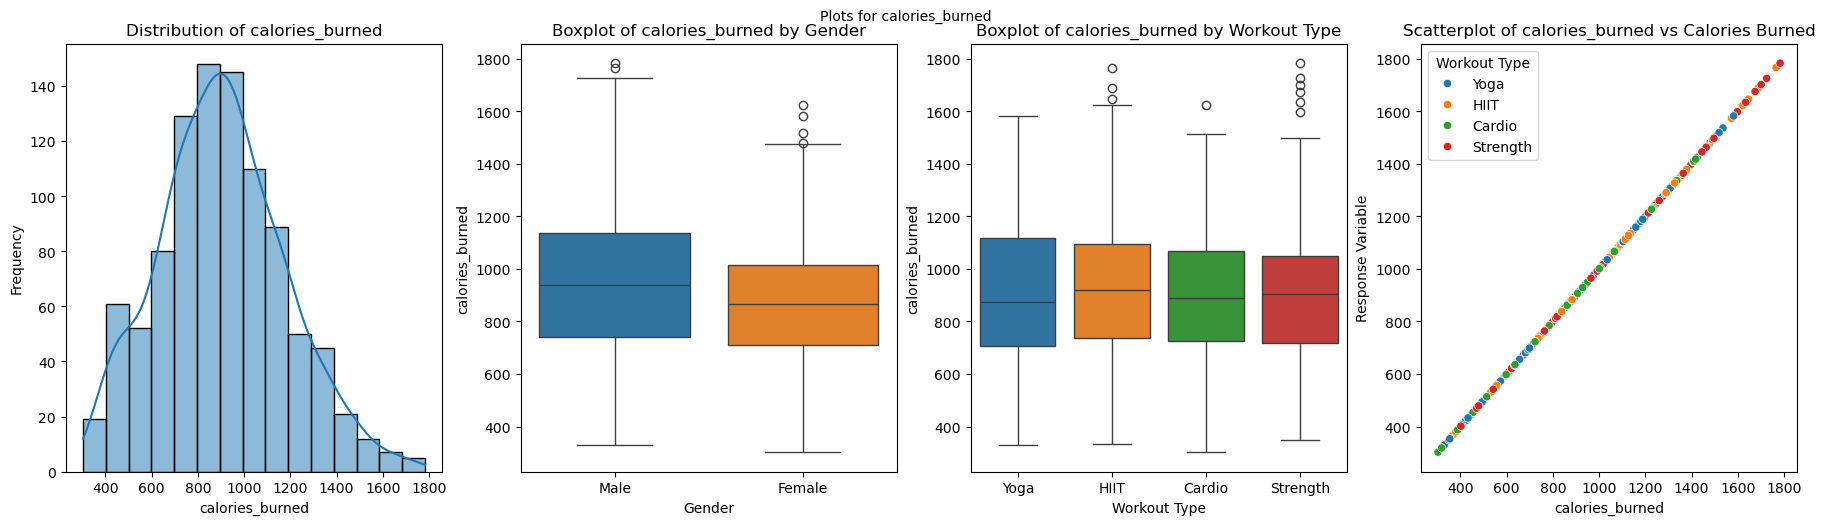

In [275]:
def plot_numeric(col_name):
    fig, axes = plt.subplots(1, 4, figsize=(18, 5), constrained_layout=True)

    # 1. Numeric Distribution
    sns.histplot(gym_data[col_name], kde=True, bins=15, ax=axes[0])
    axes[0].set_title(f'Distribution of {col_name}')
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel('Frequency')

    # 2. Boxplot for Value Variation by Categorical Columns
    sns.boxplot(x='gender', y=col_name, hue = 'gender', data=gym_data, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col_name} by Gender')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel(col_name)

    sns.boxplot(x='workout_type', y=col_name, hue = 'workout_type', data=gym_data, ax=axes[2])
    axes[2].set_title(f'Boxplot of {col_name} by Workout Type')
    axes[2].set_xlabel('Workout Type')
    axes[2].set_ylabel(col_name)

    # 3. Scatterplot vs Response Variable
    sns.scatterplot(x=gym_data[col_name], y=gym_data['calories_burned'], hue=gym_data['workout_type'], ax=axes[3])
    axes[3].set_title(f'Scatterplot of {col_name} vs Calories Burned')
    axes[3].set_xlabel(col_name)
    axes[3].set_ylabel('Response Variable')
    axes[3].legend(title='Workout Type')

    # Show the plots
    plt.suptitle(f'Plots for {col_name}', fontsize=10, y=1.02)
    plt.show()

plot_numeric('calories_burned')

Response variable is rought normal, (more likely some kind of Gamma distribution due to the strict positivity of values and left tail)

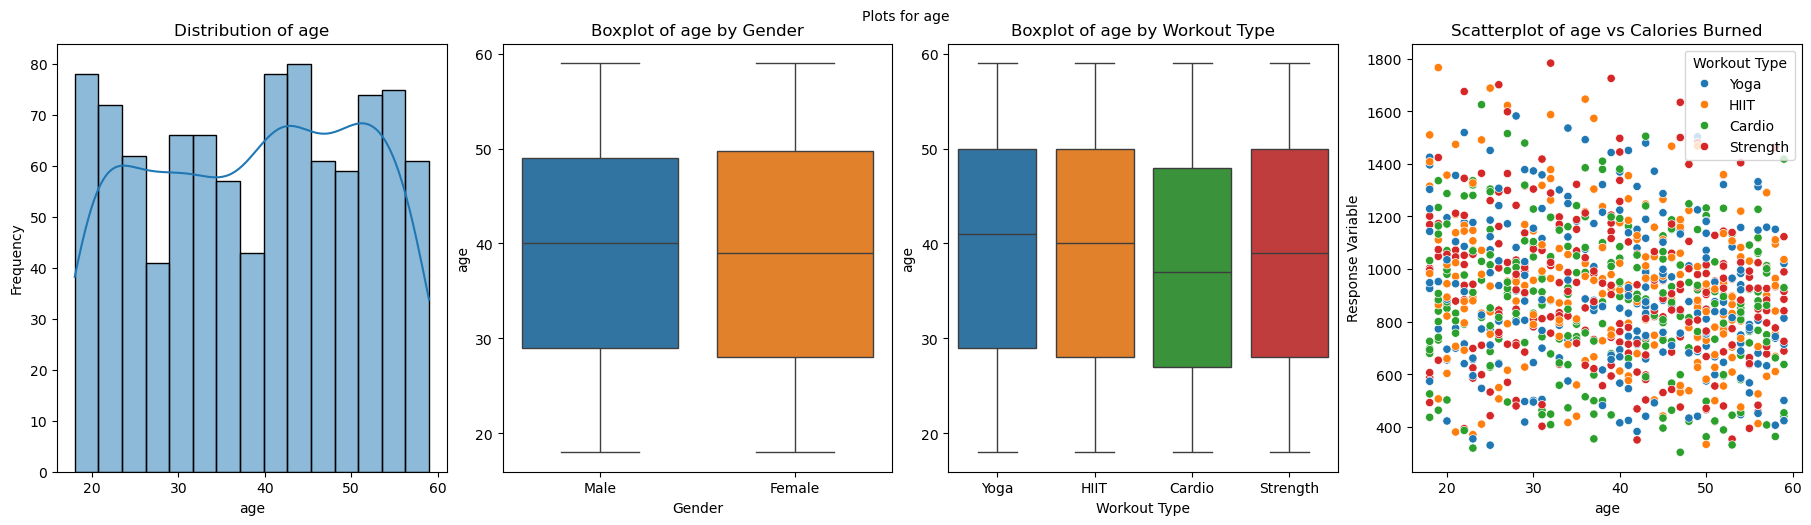

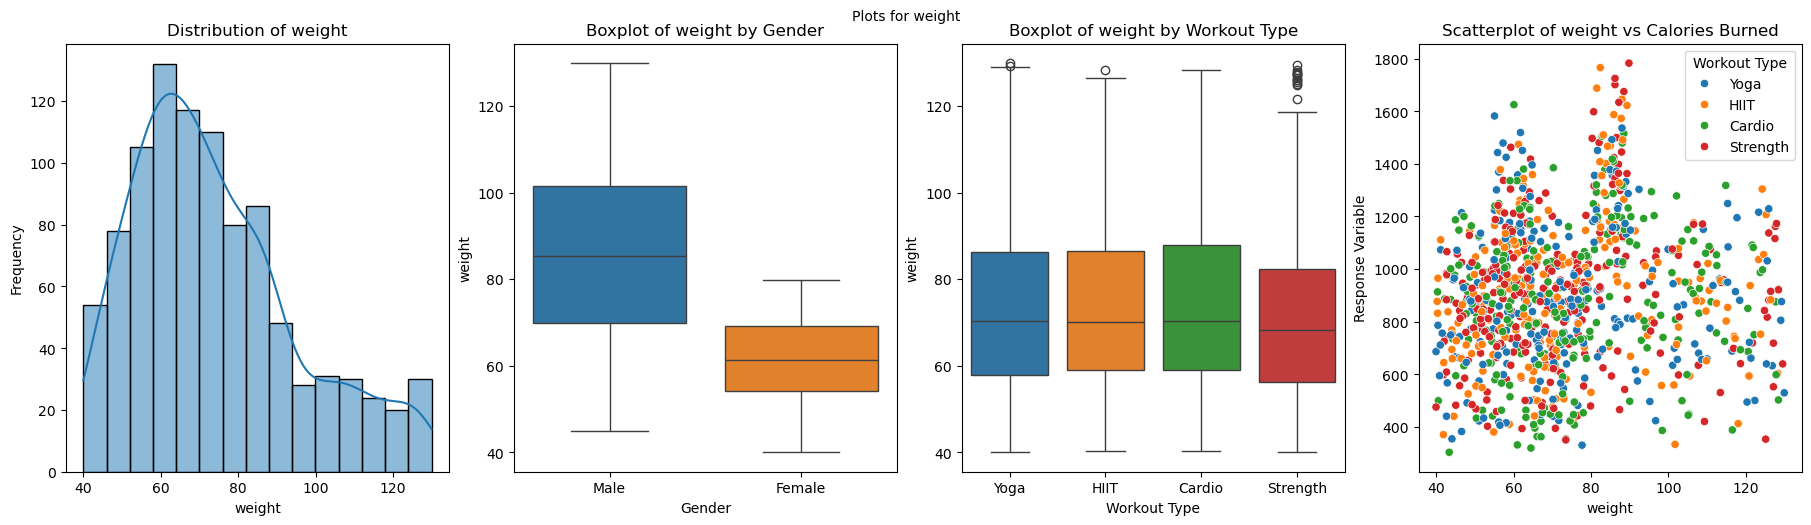

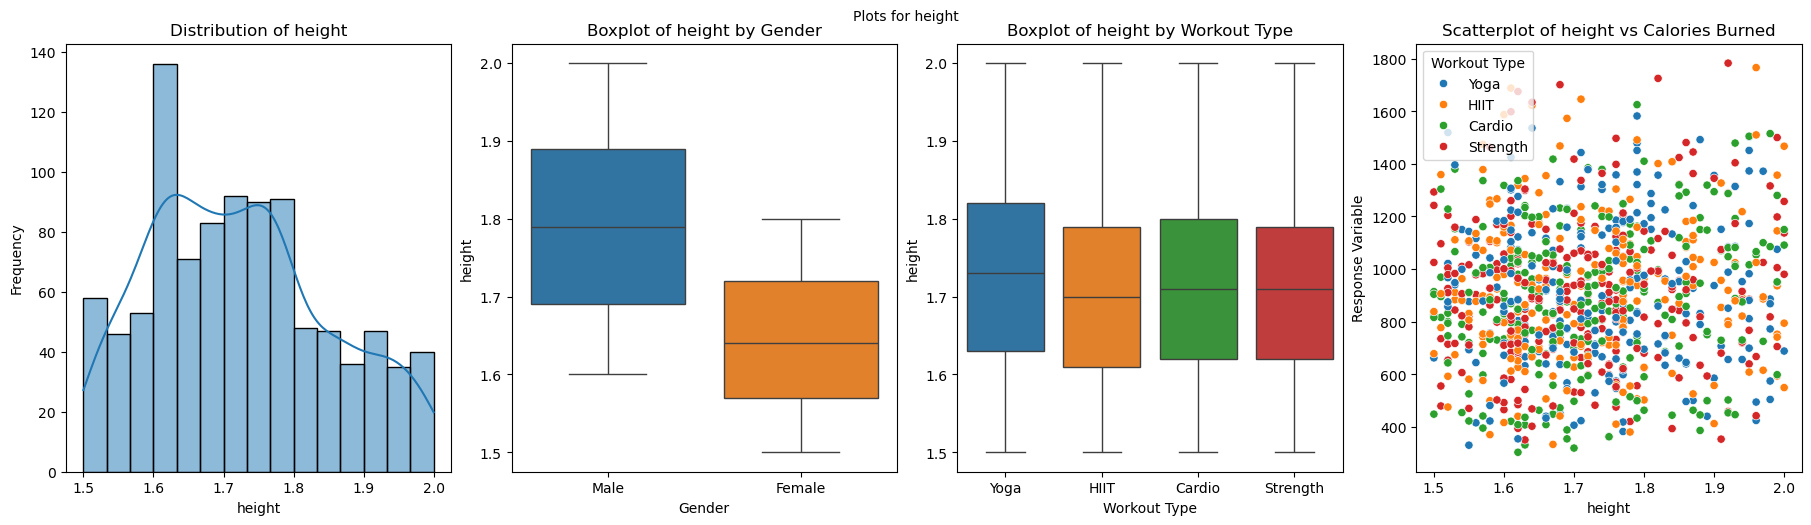

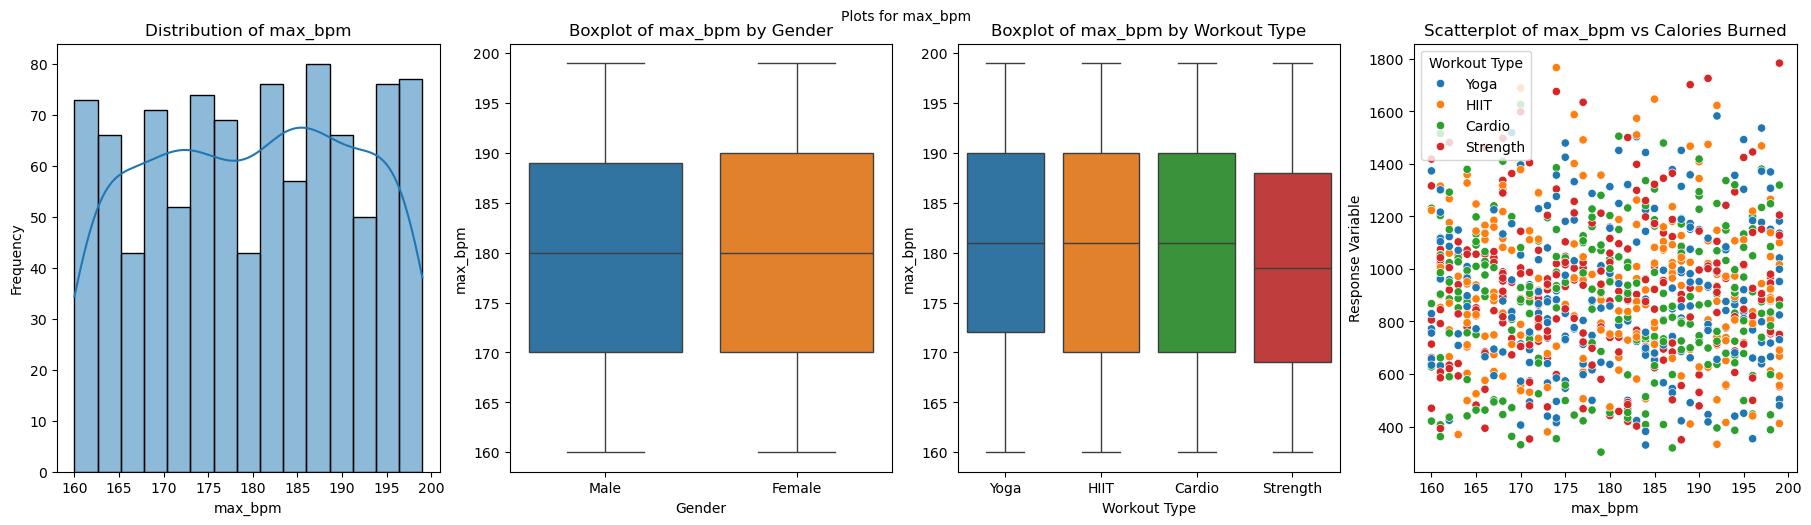

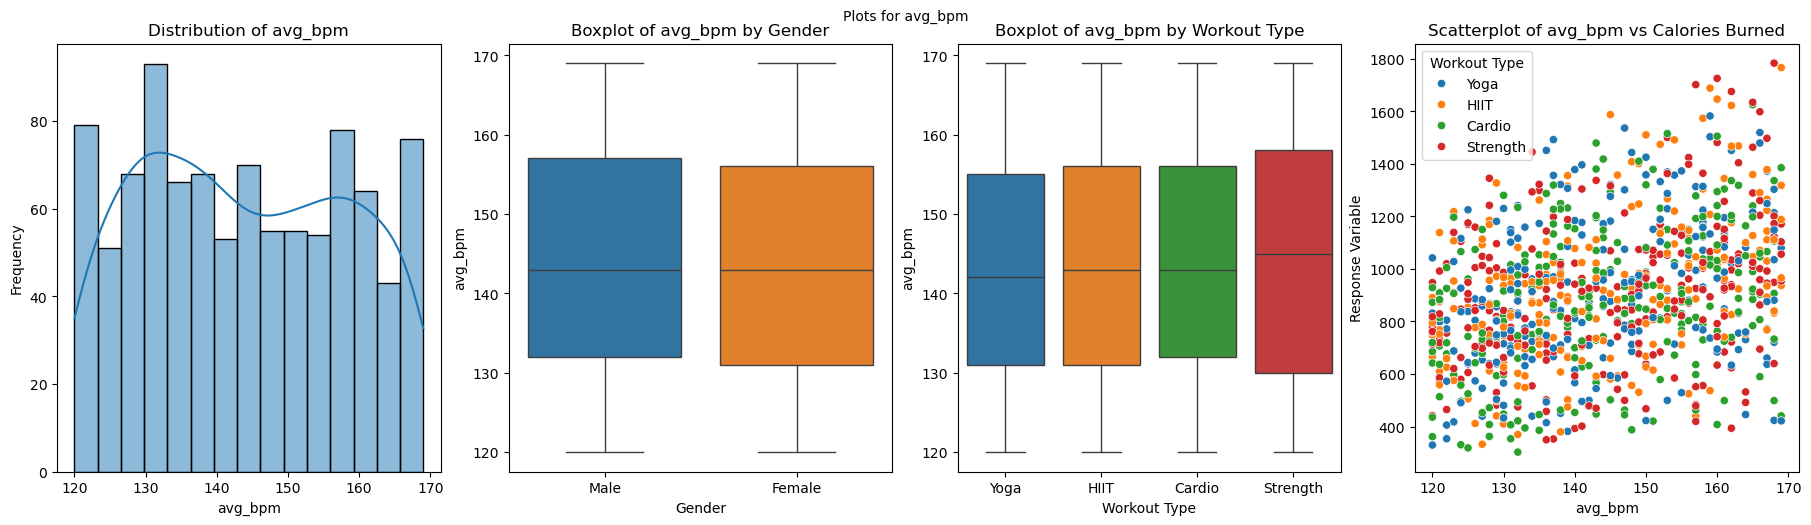

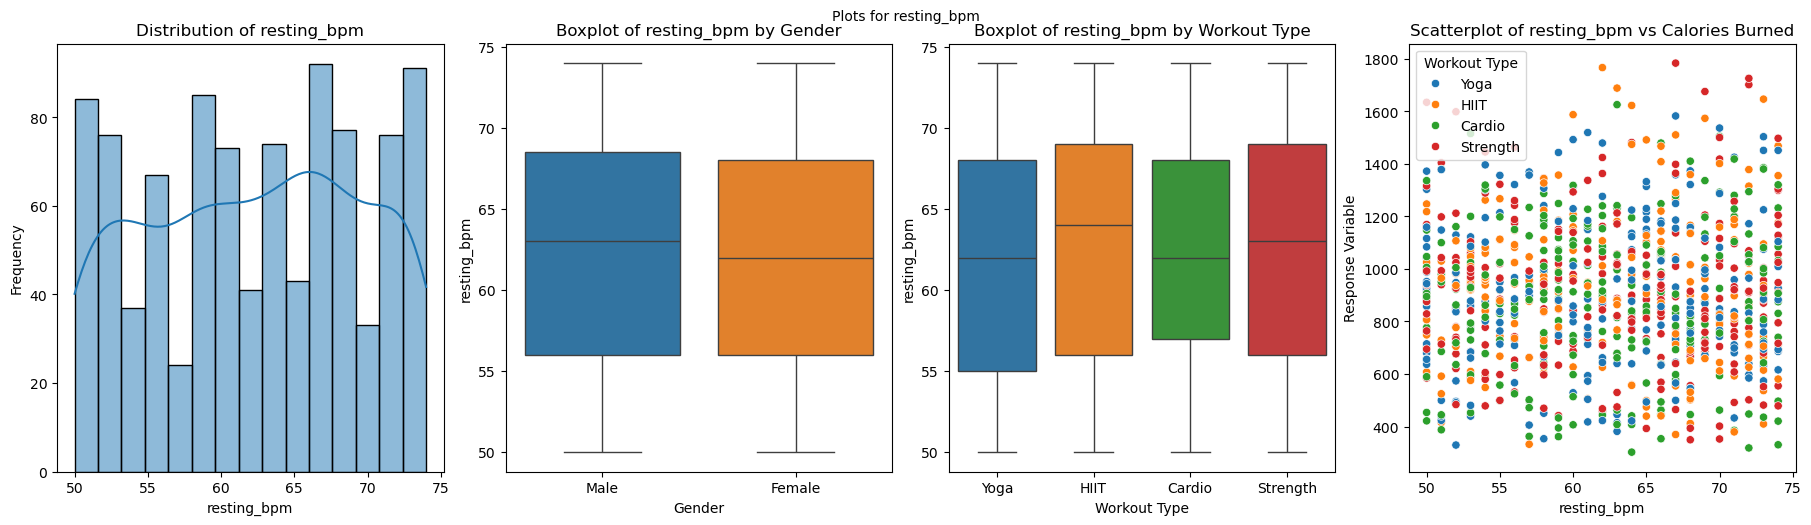

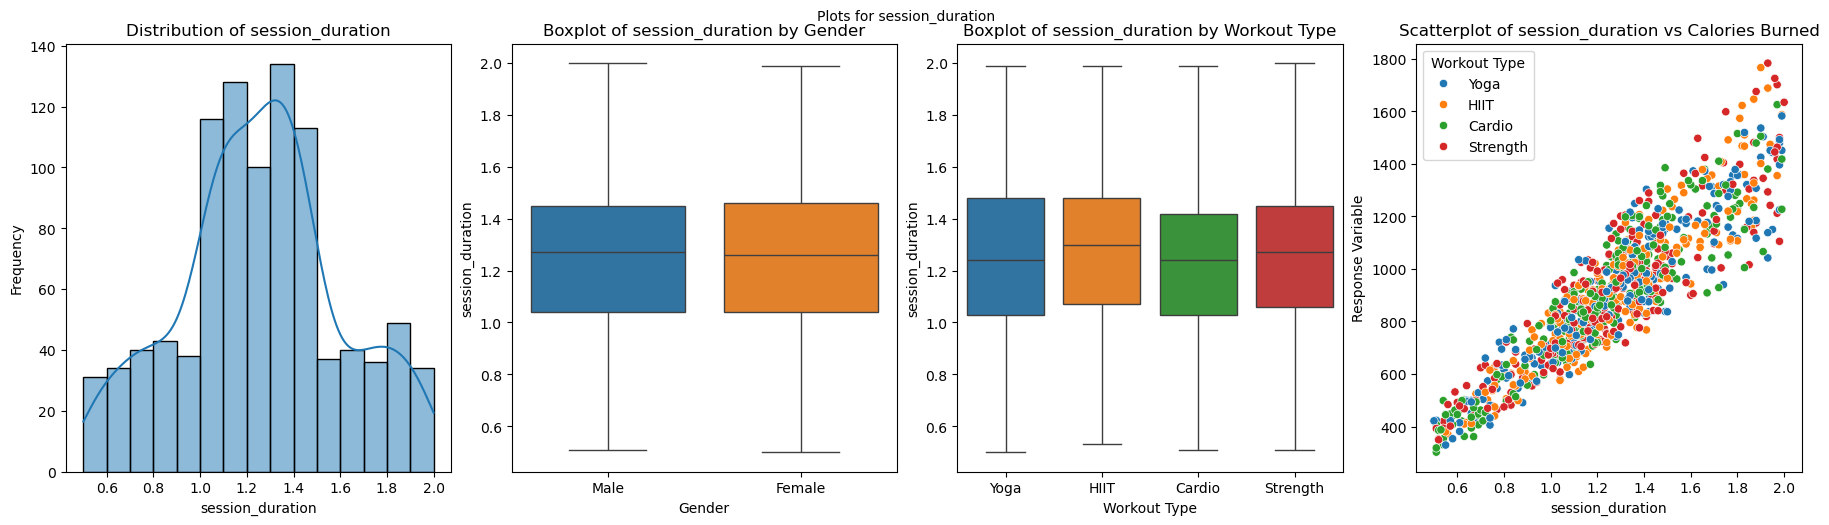

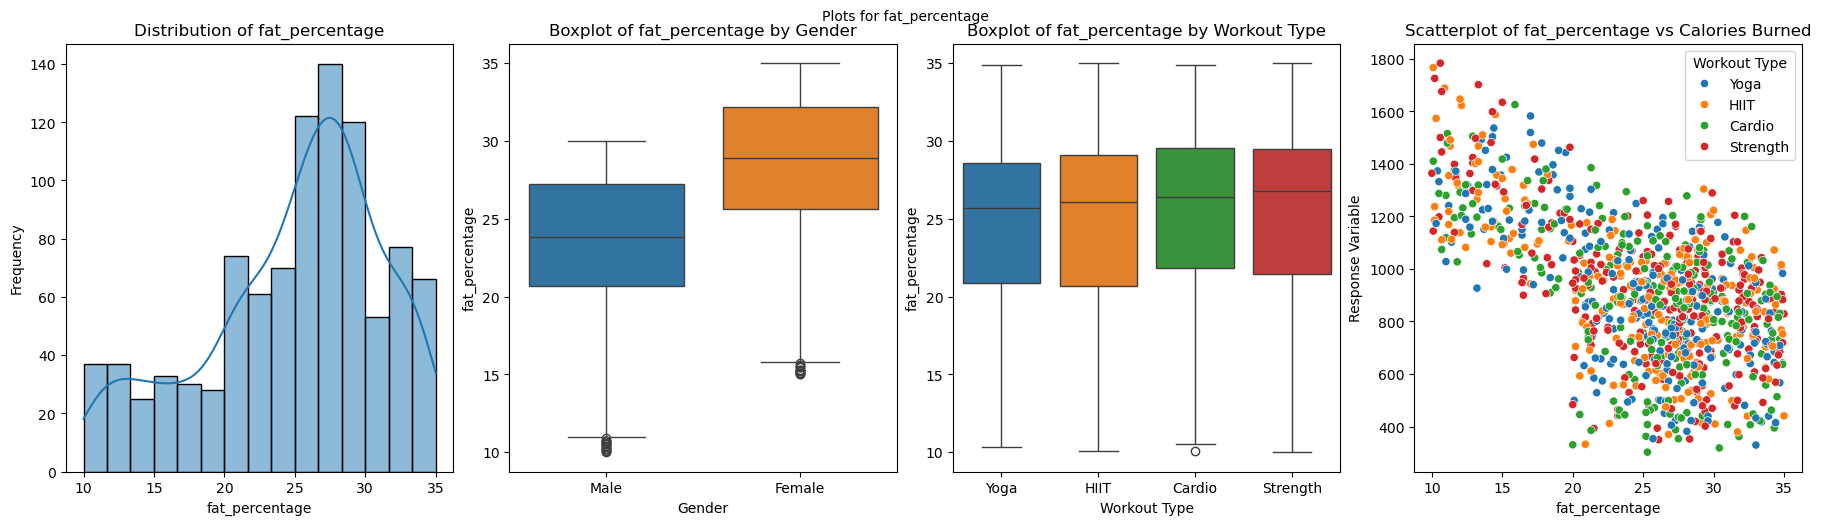

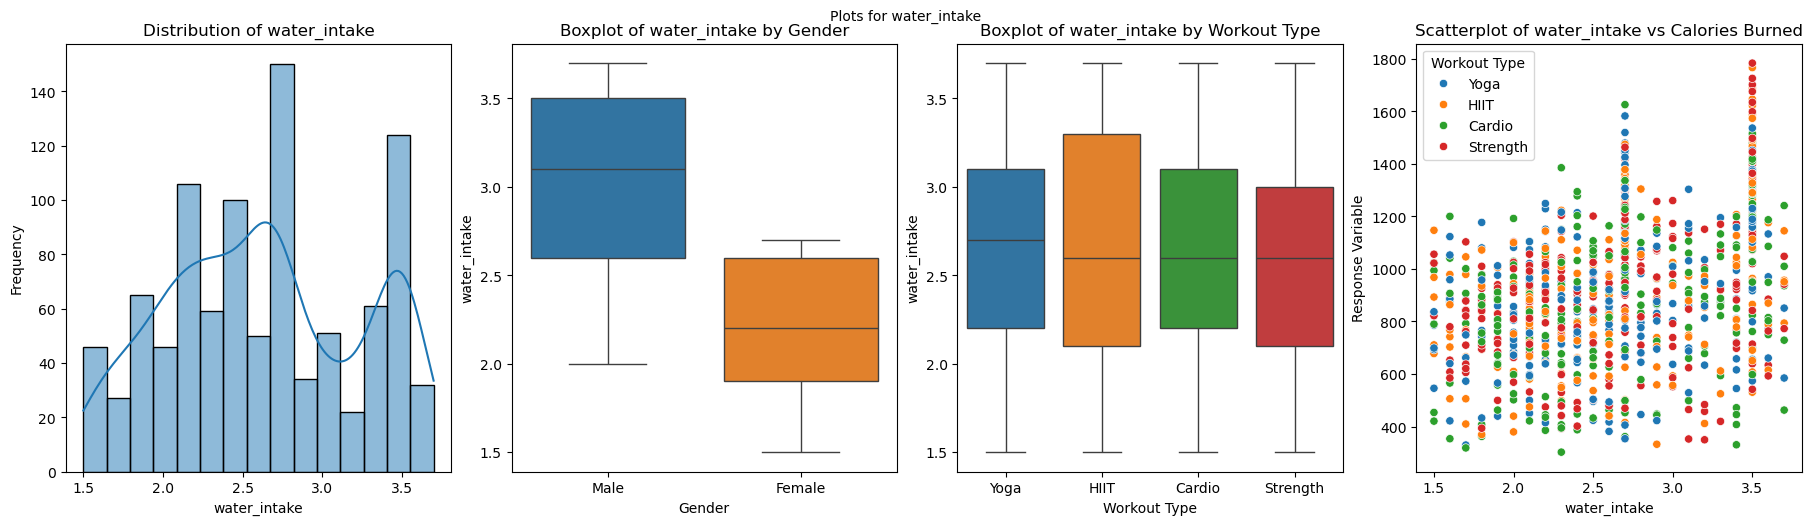

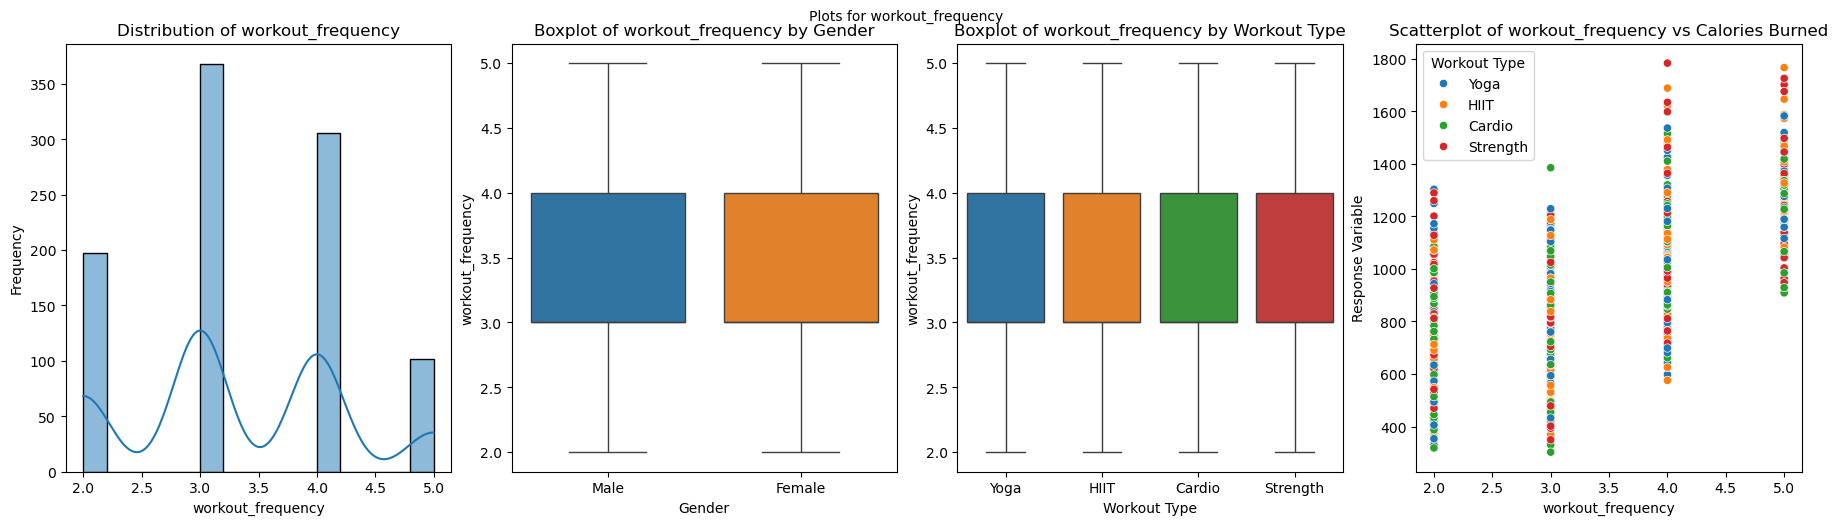

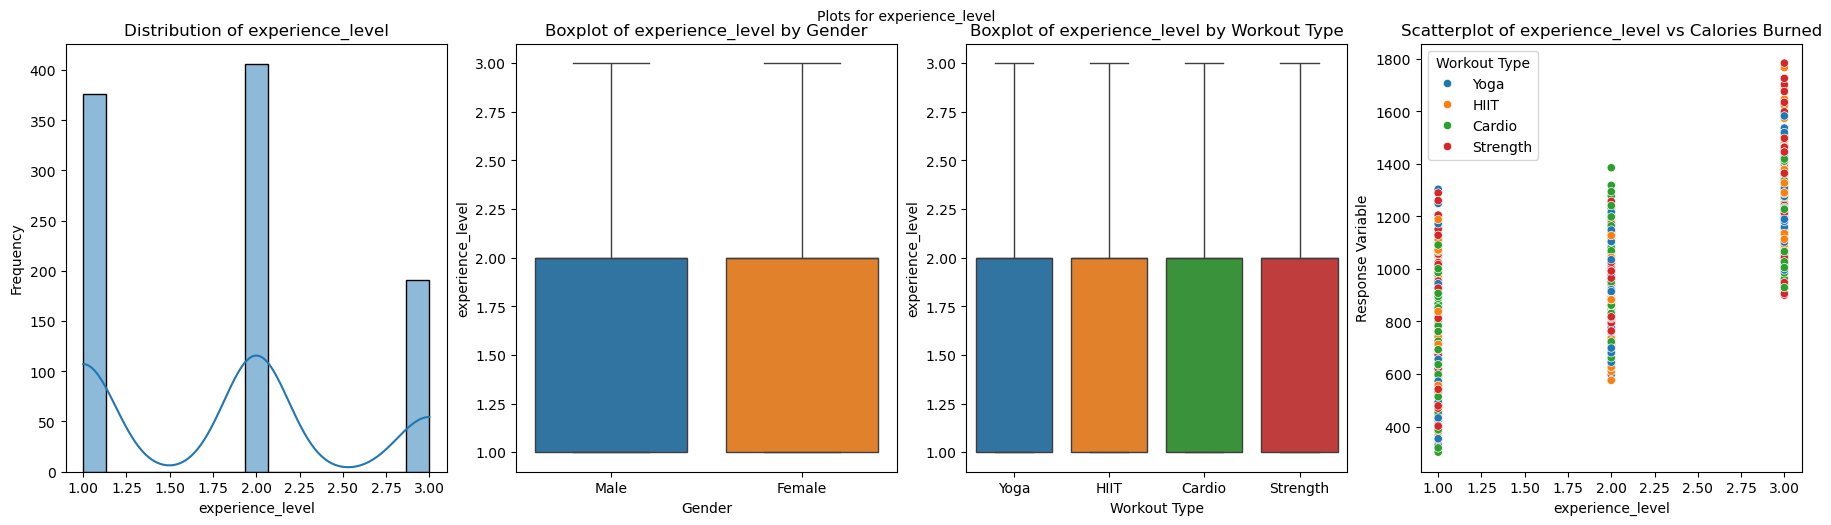

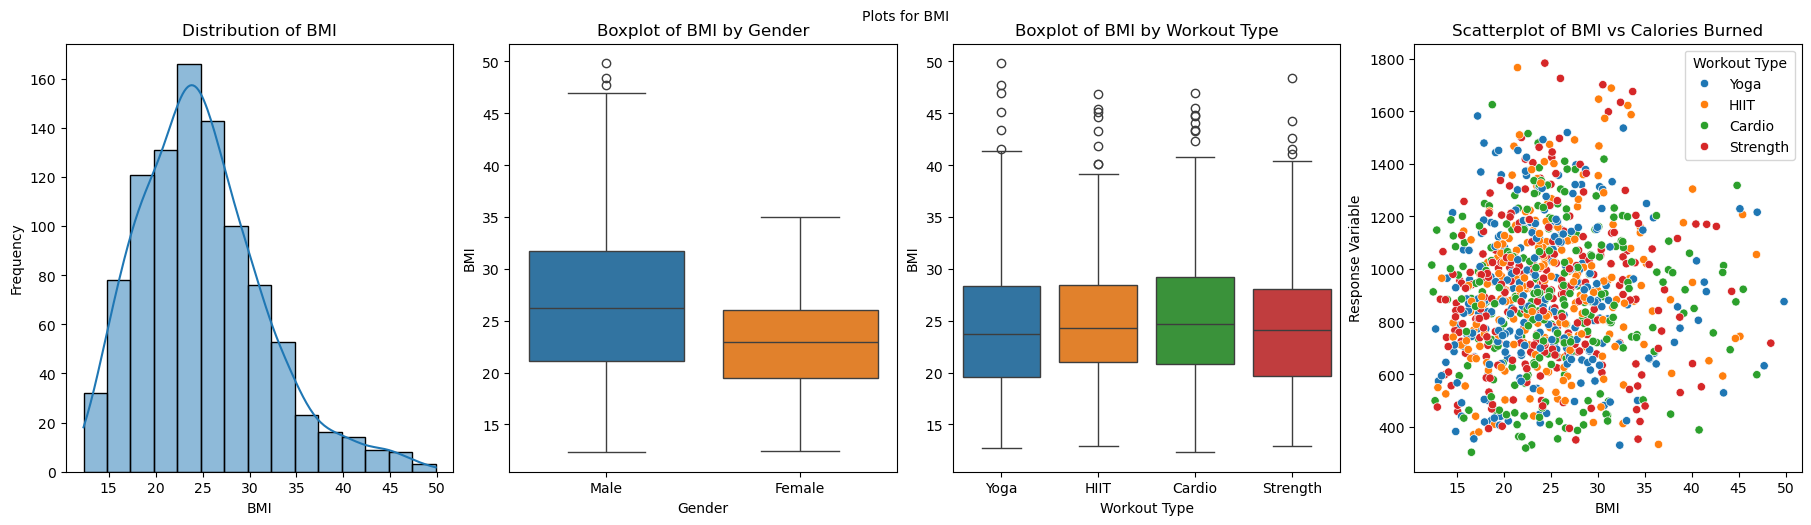

In [276]:
for numeric_col in numeric_columns:
    if numeric_col != 'calories_burned':
        plot_numeric(numeric_col)

Expecting strong association with response in Session Duration and Fat Percentage \

### Check correlations

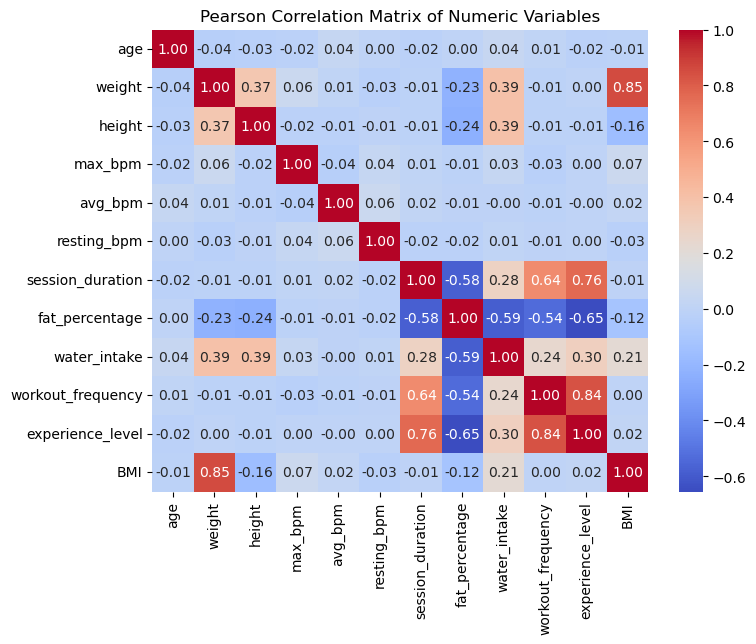

In [277]:
numeric_data = gym_data[numeric_columns]
correlation_matrix = numeric_data.corr()

# pearson correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Matrix of Numeric Variables")
plt.show()

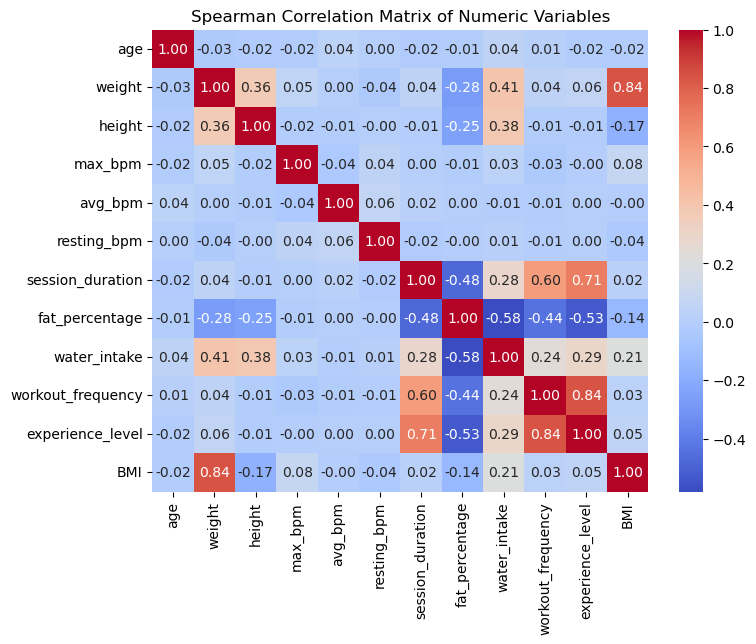

In [278]:
numeric_data = gym_data[numeric_columns]
correlation_matrix = numeric_data.corr(method = 'spearman')

# spearman correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Spearman Correlation Matrix of Numeric Variables")
plt.show()

There is potential problematic correlations between: \
Weight & BMI \
Weight & Water Intake \
Height & Water Intake \
Session Duration & Fat Percentage \
Session Duration & Workout Frequency \
Session Duration & Experience Level \
Fat Percentage & Water Intake \
Fat Percentage & Workout Frequency \
Fat Percentage & Experience Level  \
Experience Level & Workout Frequency  

# Baseline model
Define train/test sets 

In [279]:
from sklearn.model_selection import train_test_split

train_data_full, test_data_full = train_test_split(gym_data, test_size=0.2, random_state=123)

print("Train length:", len(train_data_full))
print("Test length:", len(test_data_full))

Train length: 778
Test length: 195


In [280]:
train_data_full.columns

Index(['age', 'gender', 'weight', 'height', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration', 'calories_burned', 'workout_type',
       'fat_percentage', 'water_intake', 'workout_frequency',
       'experience_level', 'BMI', 'gender_encoded', 'workout_type_ordinal',
       'strength_dummy', 'cardio_dummy', 'yoga_dummy'],
      dtype='object')

In [281]:
numeric_columns

['age',
 'weight',
 'height',
 'max_bpm',
 'avg_bpm',
 'resting_bpm',
 'session_duration',
 'fat_percentage',
 'water_intake',
 'workout_frequency',
 'experience_level',
 'BMI']

Multiple Linear Regression using all variables (dummy varaibles for workout_type)

In [282]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [283]:
sm_train_x_dummy_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
sm_train_x_ordinal_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
sm_train_y = train_data_full[['calories_burned']]

# test sets
sm_test_x_dummy_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
sm_test_x_ordinal_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
sm_test_y = test_data_full[['calories_burned']]

In [284]:
sm_train_x_dummy_vars = sm.add_constant(train_x_dummy_vars)

# Fit the model using statsmodels
baseline_mlr = sm.OLS(sm_train_y, sm_train_x_dummy_vars).fit()

# Get the summary
print(baseline_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:        calories_burned   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2145.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:59:11   Log-Likelihood:                -3975.7
No. Observations:                 778   AIC:                             7985.
Df Residuals:                     761   BIC:                             8065.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -994.9950    102.31

In [285]:
sm_test_x_dummy_vars = sm.add_constant(sm_test_x_dummy_vars)

predictions = baseline_mlr.predict(sm_test_x_dummy_vars)

# Example: Evaluate model predictions on test data
mse = mean_squared_error(sm_test_y, predictions)
r2 = r2_score(test_y, predictions)

print("Mean Squared Error:", mse)
print("RMSE:", mse**(0.5))
print("R² Score:", r2)

Mean Squared Error: 1251.5676341702226
RMSE: 35.37750180793187
R² Score: 0.9830557063417007


Issues with this model: \
Residuals do not appear to be normally distributed based on Omnibus and Jarque Bera.  \
There appears to be a high degree of multicollinearity between varaibles based on the condition number \

$R^2$ value is high though so the model is promising once these issues are addressed

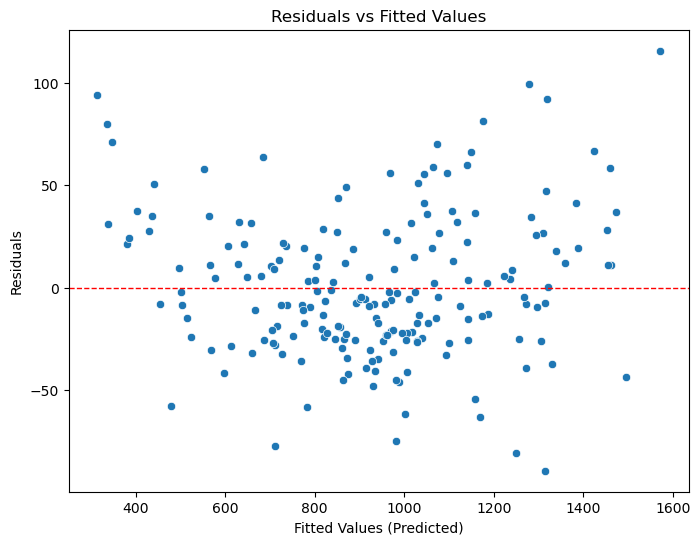

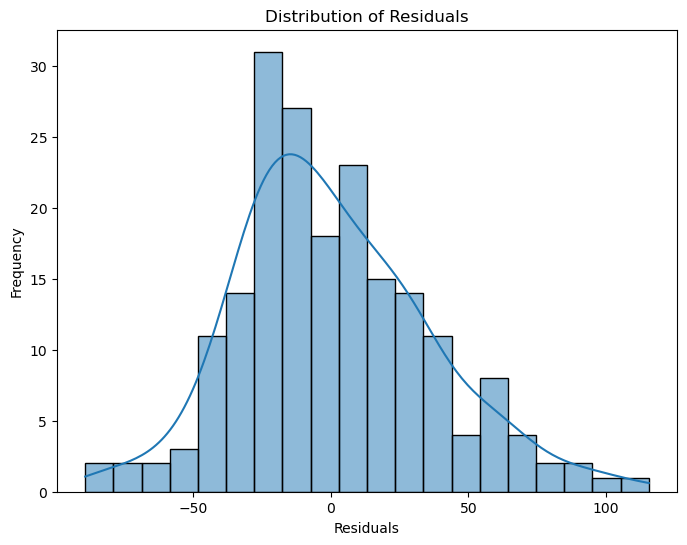

In [286]:
test_predictions = baseline_mlr.predict(sm_test_x_dummy_vars)
residuals = sm_test_y['calories_burned'] - test_predictions

# Step 2: Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()

# Step 3: Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Residuals are not quite normally distributted, but they are getting there

Second MLR model, addressing multicollinearity 

- Remove weight - BMI and other variables should be able to capture this (Consdier dropping height too)
- Remove workout frequency, very correlated and probably not too useful of a predictor in this context 
- remove workout type variables
- remove experience level - not appearing to be a strong predictor
- remove water intake - correlated with varaibles and does not appear to be too significant of a predictor
- remove max_bpm - seems like an insignificant predictor
- remove height - seems like an insignificant predictor
- remove resting bpm and bmi for insignificance

Session Duration & Fat Percentage \
Since these two are correlated, we could try making them into an interaction term.
Tested - does not impact results significantly. Can try to make them into a PCA

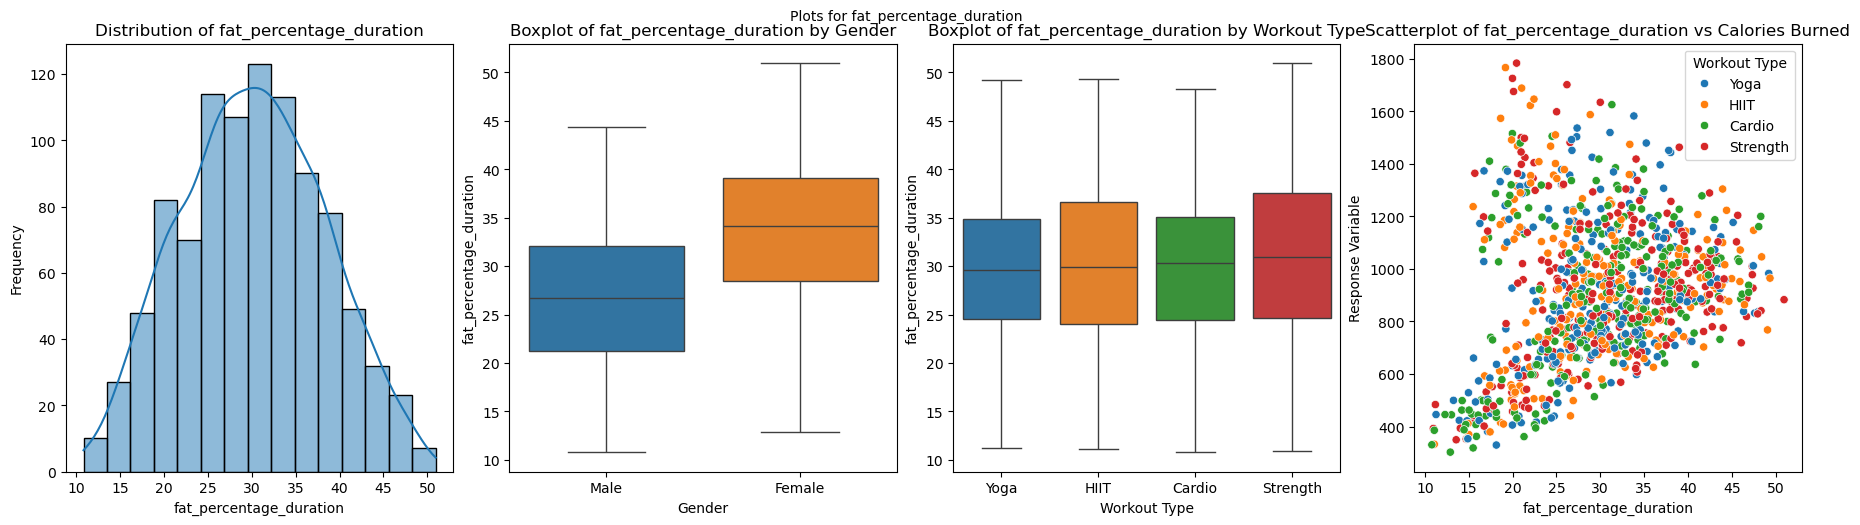

In [287]:
import math
gym_data['fat_percentage_duration'] = gym_data['fat_percentage'] * gym_data['session_duration']
plot_numeric('fat_percentage_duration')

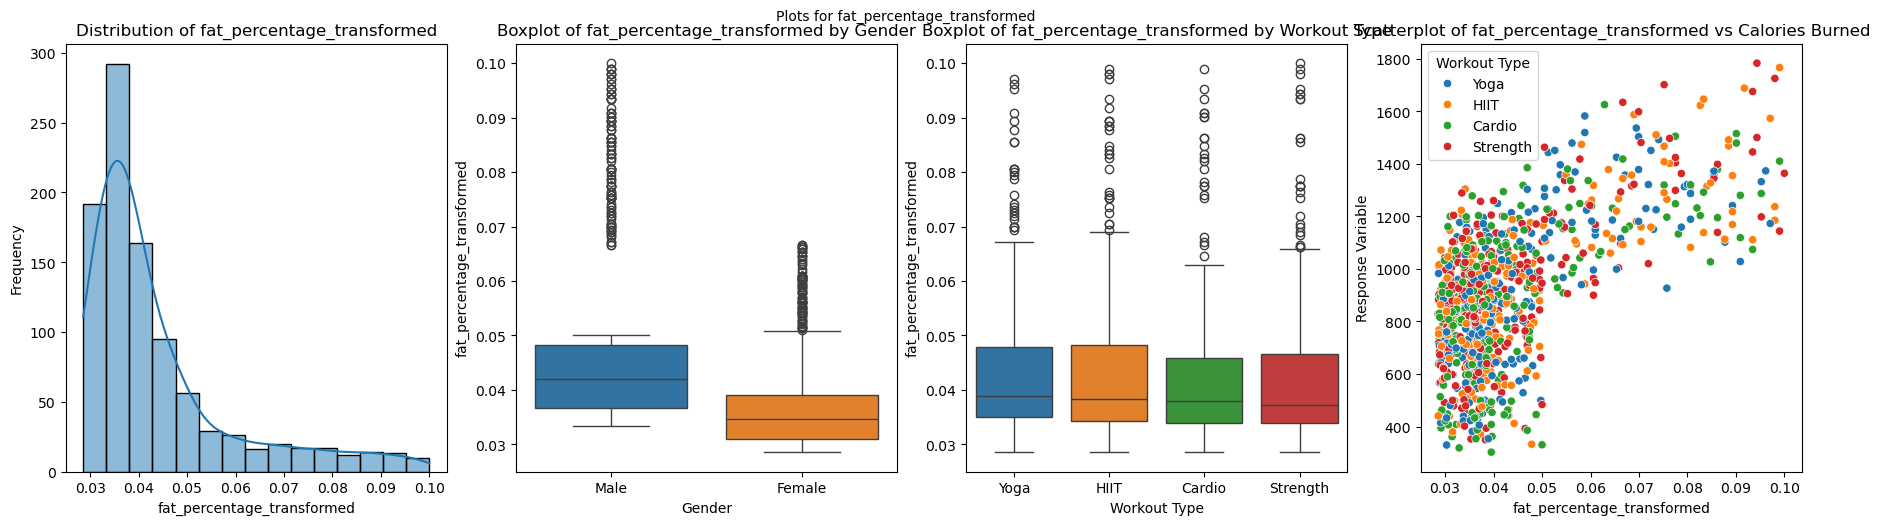

In [288]:
gym_data['fat_percentage_transformed'] = (1/(gym_data['fat_percentage']))
plot_numeric('fat_percentage_transformed')

In [289]:
x_cols = ['age','avg_bpm','session_duration','fat_percentage', 'gender_encoded']

sm_train_x_dummy_vars = train_data_full[x_cols]
sm_train_y = train_data_full[['calories_burned']]

# test sets
sm_test_x_dummy_vars = test_data_full[x_cols]
sm_test_y = test_data_full[['calories_burned']]

#sm_train_x_dummy_vars['fat_percentage_transformed'] = (1/(sm_train_x_dummy_vars['fat_percentage']))
#sm_test_x_dummy_vars['fat_percentage_transformed'] = (1/(sm_test_x_dummy_vars['fat_percentage']))

#sm_train_x_dummy_vars['fat_percentage_duration'] = sm_train_x_dummy_vars['fat_percentage_transformed'] * sm_train_x_dummy_vars['session_duration']
#sm_test_x_dummy_vars['fat_percentage_duration'] = sm_test_x_dummy_vars['fat_percentage_transformed'] * sm_test_x_dummy_vars['session_duration']

#sm_train_x_dummy_vars = sm_train_x_dummy_vars.drop('fat_percentage', axis = 1)
#sm_test_x_dummy_vars = sm_test_x_dummy_vars.drop('fat_percentage', axis = 1)


sm_train_x_dummy_vars = sm.add_constant(sm_train_x_dummy_vars)

# Fit the model using statsmodels
mlr_v1 = sm.OLS(sm_train_y, sm_train_x_dummy_vars).fit()

# Get the summary
print(mlr_v1.summary())

                            OLS Regression Results                            
Dep. Variable:        calories_burned   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6840.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:59:12   Log-Likelihood:                -3982.6
No. Observations:                 778   AIC:                             7977.
Df Residuals:                     772   BIC:                             8005.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -786.2142     21.075  

Mean Squared Error: 1269.595643633497
RMSE: 35.63138565413219
R² Score: 0.9828116349243196


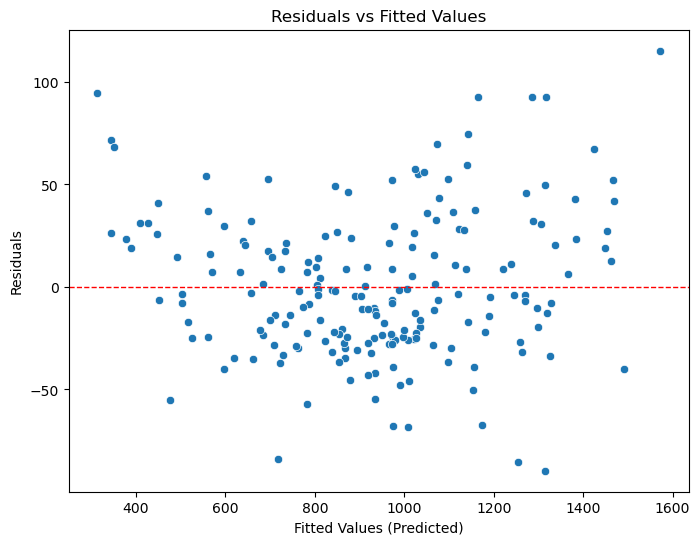

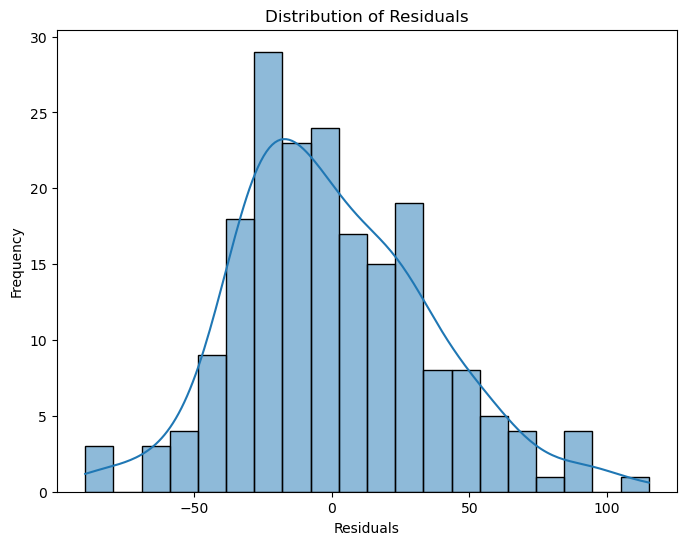

In [290]:
sm_test_x_dummy_vars = sm.add_constant(sm_test_x_dummy_vars)

predictions = mlr_v1.predict(sm_test_x_dummy_vars)

# Example: Evaluate model predictions on test data
mse = mean_squared_error(sm_test_y, predictions)
r2 = r2_score(sm_test_y, predictions)

print("Mean Squared Error:", mse)
print("RMSE:", mse**(0.5))
print("R² Score:", r2)
test_predictions = mlr_v1.predict(sm_test_x_dummy_vars)
residuals = sm_test_y['calories_burned'] - test_predictions

# Step 2: Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()

# Step 3: Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Prediction on my statistics:

In [291]:
mlr_v1.predict([1, 25, 100, 0.95, 15, 1])[0] 

506.4184506835088

# Random Forest Regressor

In [292]:
from sklearn.ensemble import RandomForestRegressor

In [293]:
rf_train_x_dummy_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
rf_train_x_ordinal_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
rf_train_y = train_data_full[['calories_burned']]

# test sets
rf_test_x_dummy_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
rf_test_x_ordinal_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
rf_test_y = test_data_full[['calories_burned']]

Baseline - check ordinal vs dummy variables

In [294]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)

# Step 3: Fit the model to the training data
rf_model.fit(rf_train_x_dummy_vars, rf_train_y)

# Step 4: Make predictions on the test set
predictions = rf_model.predict(rf_test_x_dummy_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(rf_test_y, predictions)
r2 = r2_score(rf_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 1770.129402564103
Mean Absolute Error (MAE): 42.07290580128859
R-squared (R²): 0.9760351805277215


In [295]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)

# Step 3: Fit the model to the training data
rf_model.fit(rf_train_x_ordinal_vars, rf_train_y)

# Step 4: Make predictions on the test set
predictions = rf_model.predict(rf_test_x_ordinal_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(rf_test_y, predictions)
r2 = r2_score(rf_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 1802.302135897436
Mean Absolute Error (MAE): 42.45352913360014
R-squared (R²): 0.9755996113850666


Seems like it will not make too much of a difference, let's use \
the dummy variable set. \
Now, let's do a grid search to get the best set of hyperparameters

In [296]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=123),
                           param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(rf_train_x_dummy_vars, rf_train_y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [297]:
# Best model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [298]:
rf_model = best_rf_model

rf_model.fit(rf_train_x_dummy_vars, rf_train_y)

# Step 4: Make predictions on the test set
predictions = rf_model.predict(rf_test_x_dummy_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(rf_test_y, predictions)
r2 = r2_score(rf_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 1770.129402564103
Mean Absolute Error (MAE): 42.07290580128859
R-squared (R²): 0.9760351805277215


Not a great model, even compared to our MLR model baseline. Let's check feature importances

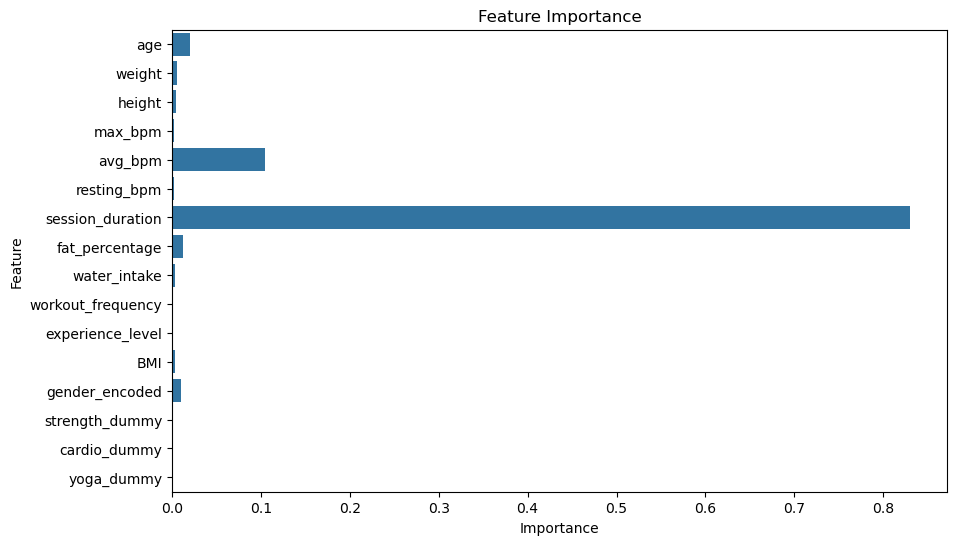

In [299]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = rf_test_x_dummy_vars.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [300]:
importances

array([2.04741345e-02, 5.77645394e-03, 4.07314726e-03, 2.22264477e-03,
       1.04113861e-01, 2.56732735e-03, 8.30282936e-01, 1.23804916e-02,
       3.61279600e-03, 6.15161726e-04, 2.43480036e-04, 2.92698385e-03,
       9.53567046e-03, 4.39888655e-04, 3.27111183e-04, 4.07912368e-04])

Lets retry the gridsearch with only important varaibles greater than 0.01

In [301]:
rf_train_x_dummy_vars = train_data_full[['age','avg_bpm','session_duration','fat_percentage', 'gender_encoded' ]]
rf_train_y = train_data_full[['calories_burned']]

# test sets
rf_test_x_dummy_vars = test_data_full[['age','avg_bpm','session_duration','fat_percentage', 'gender_encoded' ]]
rf_test_y = test_data_full[['calories_burned']]

In [302]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=123),
                           param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(rf_train_x_dummy_vars, rf_train_y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [303]:
# Best model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

rf_model = best_rf_model

rf_model.fit(rf_train_x_dummy_vars, rf_train_y)

# Step 4: Make predictions on the test set
predictions = rf_model.predict(rf_test_x_dummy_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(rf_test_y, predictions)
r2 = r2_score(rf_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 1154.5827929914533
Mean Absolute Error (MAE): 33.9791523289127
R-squared (R²): 0.9843687313708483


Much better, but our model performed better with the max number of parameters in our search. Let's increase it.

In [304]:
param_grid = {
    'n_estimators': [300,500,700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=123),
                           param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(rf_train_x_dummy_vars, rf_train_y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.6s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.4s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500, 700]},
             scoring='neg_mean_squared_error', verbose=2)

In [305]:
# Best model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

rf_model = best_rf_model

rf_model.fit(rf_train_x_dummy_vars, rf_train_y)

# Step 4: Make predictions on the test set
predictions = rf_model.predict(rf_test_x_dummy_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(rf_test_y, predictions)
r2 = r2_score(rf_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 1154.5827929914533
Mean Absolute Error (MAE): 33.9791523289127
R-squared (R²): 0.9843687313708483


300 remains the best \
see how it predicts on my data

In [306]:
rf_model.predict(np.array([25, 100, 0.95, 15, 1]).reshape(1, -1))[0]

/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


646.8233333333334

Finally, lets check out feature importances

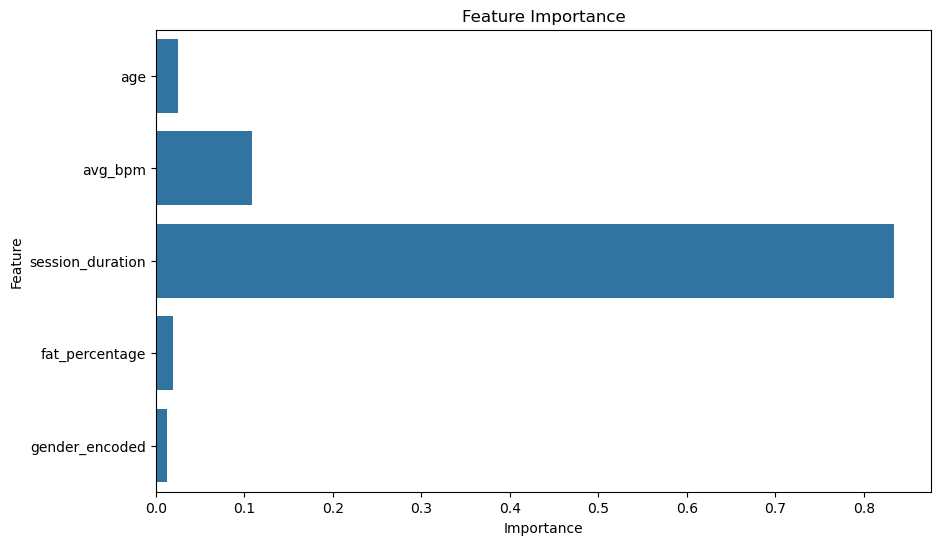

In [307]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = rf_test_x_dummy_vars.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Let's try a gradient boosting model. \
Start with a baseline model, compare ordinal vs dummy varirables

In [308]:
from sklearn.ensemble import GradientBoostingRegressor

gb_train_x_dummy_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
gb_train_x_ordinal_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
gb_train_y = train_data_full[['calories_burned']]

# test sets
gb_test_x_dummy_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
gb_test_x_ordinal_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
gb_test_y = test_data_full[['calories_burned']]

# Step 2: Instantiate the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=123)

# Step 3: Fit the model to the training data
gbr_model.fit(gb_train_x_dummy_vars, gb_train_y)

# Step 4: Make predictions on the test set
predictions = gbr_model.predict(gb_test_x_dummy_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(gb_test_y, predictions)
r2 = r2_score(gb_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 501.9737420006058
Root Mean Squared Error (RMSE): 22.40477051881152
R-squared (R²): 0.993204050455609


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Very powerful model out of the gate!

In [309]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 2: Instantiate the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=123)

# Step 3: Fit the model to the training data
gbr_model.fit(gb_train_x_ordinal_vars, gb_train_y)

# Step 4: Make predictions on the test set
predictions = gbr_model.predict(gb_test_x_ordinal_vars)

# Step 5: Evaluate the model
mse = mean_squared_error(gb_test_y, predictions)
r2 = r2_score(gb_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mean Squared Error (MSE): 495.96251012712946
Root Mean Squared Error (RMSE): 22.27021576292267
R-squared (R²): 0.9932854332553327


Let's use the ordinal data!

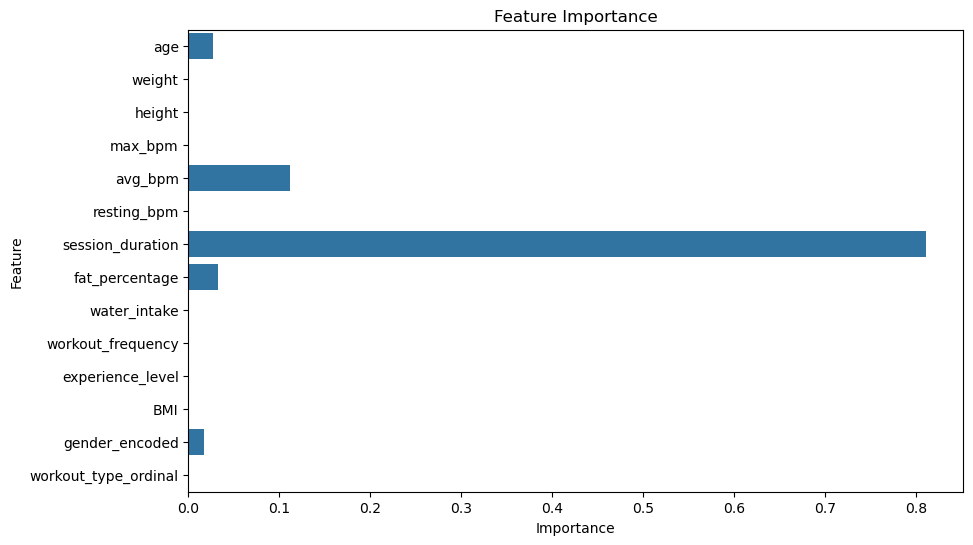

In [310]:
# Feature Importance
importances = gbr_model.feature_importances_
feature_names = gb_train_x_ordinal_vars.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Let's remove all ~0 feature importance varaibles

In [311]:
gb_train_x = train_data_full[['age','avg_bpm','session_duration','fat_percentage','gender_encoded']]
gb_train_y = train_data_full[['calories_burned']]

# test sets
gb_test_x = test_data_full[['age','avg_bpm','session_duration','fat_percentage','gender_encoded']]
gb_test_y = test_data_full[['calories_burned']]

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=123)

# Step 3: Fit the model to the training data
gbr_model.fit(gb_train_x, gb_train_y)

# Step 4: Make predictions on the test set
predictions = gbr_model.predict(gb_test_x)

# Step 5: Evaluate the model
mse = mean_squared_error(gb_test_y, predictions)
r2 = r2_score(gb_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 474.66076172619495
Root Mean Squared Error (RMSE): 21.786710667886396
R-squared (R²): 0.9935738260440932


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Let's do a gridsearch

In [312]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Gradient Boosting
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(gb_train_x, gb_train_y)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinso

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [313]:
# Best model
best_gbr_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

gbr_model = best_gbr_model

predictions = gbr_model.predict(gb_test_x)

# Step 5: Evaluate the model
mse = mean_squared_error(gb_test_y, predictions)
r2 = r2_score(gb_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 289.52440616752006
Root Mean Squared Error (RMSE): 17.015416720360395
R-squared (R²): 0.9960802864939858


Let's see if we can further opimize learning rate, number of estimators, and min samples split

In [314]:
param_grid = {
    'n_estimators': [300, 400, 500,600],
    'learning_rate': [0.15, 0.2, 0.25, 0.3],
    'max_depth': [3],
    'min_samples_split': [10, 12, 15, 20],
    'min_samples_leaf': [2]
}

# GridSearchCV for Gradient Boosting
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(gb_train_x, gb_train_y)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.15, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   0.2s


/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3], 'min_samples_leaf': [2],
                         'min_samples_split': [10, 12, 15, 20],
                         'n_estimators': [300, 400, 500, 600]},
             scoring='neg_mean_squared_error', verbose=2)

In [315]:
# Best model
best_gbr_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

gbr_model = best_gbr_model

predictions = gbr_model.predict(gb_test_x)

# Step 5: Evaluate the model
mse = mean_squared_error(gb_test_y, predictions)
r2 = r2_score(gb_test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse**(0.5)}")
print(f"R-squared (R²): {r2}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 600}
Mean Squared Error (MSE): 265.4693364011111
Root Mean Squared Error (RMSE): 16.29322977193629
R-squared (R²): 0.9964059550035931


Let's use this model, we could increase the number of estiamtors, but we run up against overfitting on the training data where the number of estimators is greater than the number of observations. \
Let's look at feature importances

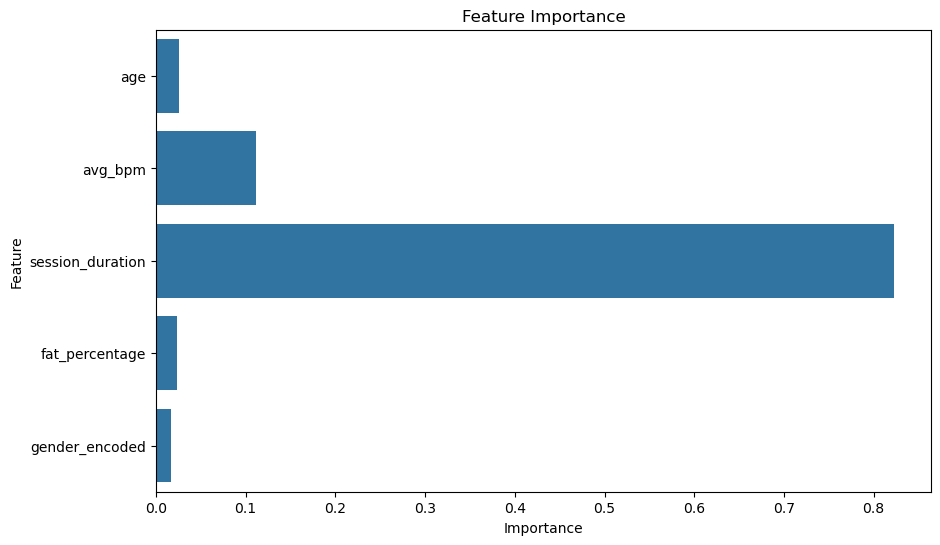

In [316]:
# Feature Importance
importances = gbr_model.feature_importances_
feature_names = gb_test_x.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Let's also check our residual plot

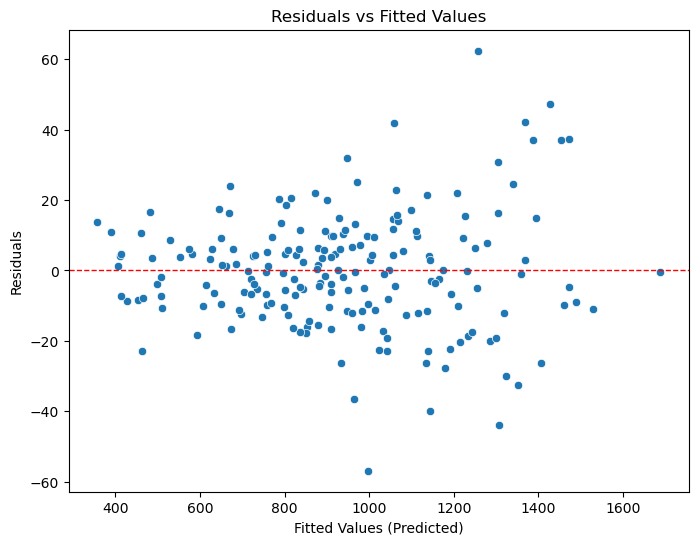

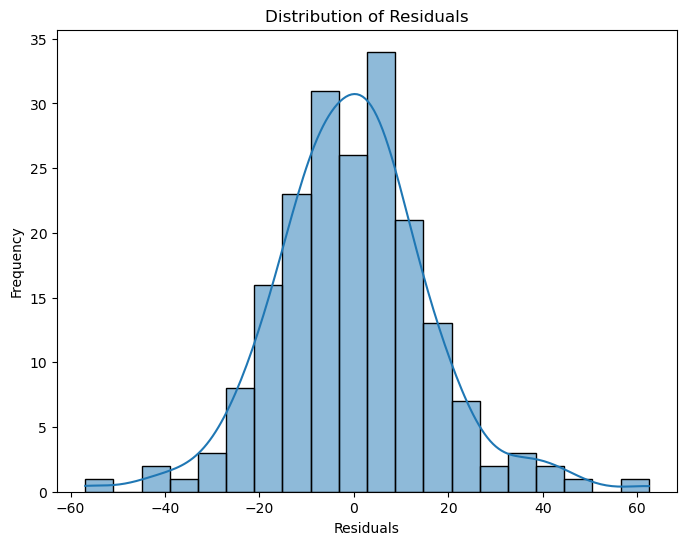

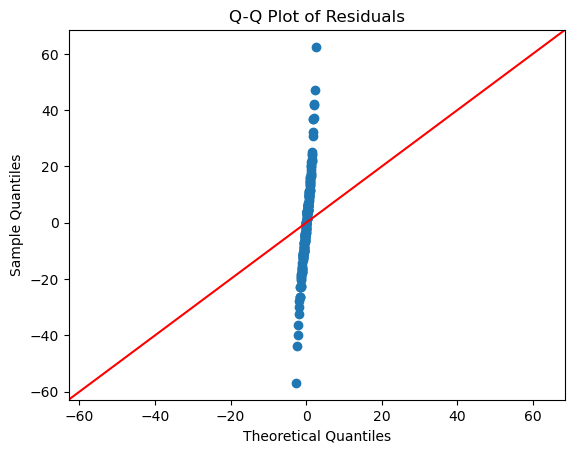

In [317]:
test_predictions = gbr_model.predict(gb_test_x)  # Predictions from the Gradient Boosting Regressor
residuals = np.array(gb_test_y).flatten() - np.array(test_predictions).flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()

# Step 3: Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

Finally, let's see how it predicts on my data.

In [318]:
gbr_model.predict(np.array([25, 100, 0.95, 15, 1]).reshape(1, -1))[0] 

/Users/patrickhinson/miniforge3/envs/torch-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


647.8383707685551